# Dataset 1 – Resume Dataset (Avishek Majhi)

Este notebook limpia el **Dataset 1** para el Modelo 1 (CV → rol tech).

## Origen de los datos

- Kaggle: https://www.kaggle.com/datasets/avishekmajhi/resume-dataset

> **Importante:** los datos **NO** se suben al repositorio (están en `.gitignore`).  
> Cada persona que use este proyecto debe descargar los datos en local.

## Instrucciones para descargar y colocar el dataset

1. Ve al enlace de Kaggle:  
   https://www.kaggle.com/datasets/avishekmajhi/resume-dataset
2. Descarga el fichero CSV del dataset (por ejemplo `Resume.csv`).
3. Cópialo dentro de la carpeta:

   `data/model1_cv_role/1.raw/`

4. Renómbralo a:

   `resumes_dataset1.csv`

   (o ajusta el nombre en el código si prefieres otro).

## Ruta esperada en este notebook

Este notebook asume que el archivo está en:

```text
data/model1_cv_role/1.raw/resumes_dataset1.csv
```

Si usas otro nombre o ubicación, cambia file_path en la celda de lectura.


In [1]:
import pandas as pd


In [2]:
file_path = file_path = "../1.raw/resumes_dataset1.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Resume,Category
0,Python Developer Python Developer Philadelphia...,Python_Developer
1,Python Developer Python Developer Python Devel...,Python_Developer
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python_Developer
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python_Developer
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python_Developer


In [5]:
df['Category'].nunique()

10

In [6]:
df['Category'].value_counts()

Category
Python_Developer          1278
Java_Developer            1242
Web_Developer              984
Database_Administrator     920
Security_Analyst           876
Systems_Administrator      776
Project_manager            722
Front_End_Developer        530
Network_Administrator      469
Software_Developer         437
Name: count, dtype: int64

In [8]:
df['Category'].value_counts(normalize=True) * 100  # porcentaje

Category
Python_Developer          15.521010
Java_Developer            15.083799
Web_Developer             11.950449
Database_Administrator    11.173184
Security_Analyst          10.638815
Systems_Administrator      9.424338
Project_manager            8.768521
Front_End_Developer        6.436726
Network_Administrator      5.695895
Software_Developer         5.307263
Name: proportion, dtype: float64

In [9]:
df.isna().sum()

Resume      0
Category    0
dtype: int64

In [13]:
df['resume_len'] = df['Resume'].str.len()
df['resume_len'].describe()

count     8234.000000
mean      7820.704761
std       5989.551265
min         39.000000
25%       3194.500000
50%       5893.500000
75%      11257.750000
max      43638.000000
Name: resume_len, dtype: float64

In [15]:
df.nsmallest(5, 'resume_len')[['Resume', 'Category', 'resume_len']]


,Resume,Category,resume_len
4573,IT Security Analyst IT Security Analyst,Security_Analyst,39
4574,IT Security Analyst IT Security Analyst,Security_Analyst,39
6277,Systems Administrator Systems Administrator Em...,Systems_Administrator,113
3484,Network Administrator Network Administrator Sa...,Network_Administrator,143
3611,IT Project Manager IT Project Manager Princeto...,Project_manager,147


In [16]:
df.nlargest(5, 'resume_len')[['Resume', 'Category', 'resume_len']]

,Resume,Category,resume_len
389,Sr. Python Developer Sr. Python Developer Sr. ...,Python_Developer,43638
6928,Full Stack .Net Developer Full Stack .Net Deve...,Web_Developer,40010
2418,JAVA DEVELOPER JAVA DEVELOPER JAVA DEVELOPER -...,Java_Developer,36391
1895,Systems Analyst Systems Analyst Java/J2EE with...,Java_Developer,36280
1200,Python Developer Python Developer Python Devel...,Python_Developer,35787


In [17]:
df.duplicated(subset=['Resume']).sum()


67

In [18]:
# Ver los primeros 300 caracteres de un ejemplo por categoría
for cat in df['Category'].unique():
    ejemplo = df[df['Category'] == cat]['Resume'].iloc[0]
    print("="*80)
    print(cat)
    print(ejemplo[:300])


Python_Developer
Python Developer Python Developer Philadelphia, PA Work Experience Python Developer December 2017 to Present Python Developer 2 Years Education Bachelor's in Computer Science Philadelphia, PA
Java_Developer
Front end software trainee Front end software trainee Java devoloper Kochi, kerala, india  2 year of experience in Web Application Development and designing for Islamic Banking.  Front end software trainee in Opentrends Technologies Pvt Ltd (Erstwhile yOptimizo IT  Solutions Pvt Ltd) for 3 months.  
Front_End_Developer
Senior Front End Developer Senior Front End Developer Software Engineer McKinney, TX I have experience spanning both Back End and Front End development in environments built upon LAMP and MEAN technologies with varying frameworks. I have experience in migrating existing codebases from one technology
Network_Administrator
Radio Access Network/Transport Engineer Radio Access Network/Transport Engineer INFORMATION TECHNOLOGY PROFESSIONAL Dallas, TX Self-

In [19]:
def category_in_text(row):
    # Convertimos "Python_Developer" -> "python developer"
    cat_clean = row['Category'].replace("_", " ").lower()
    text = str(row['Resume']).lower()
    return cat_clean in text

df['cat_in_text'] = df.apply(category_in_text, axis=1)
df['cat_in_text'].mean()


0.8237794510565946

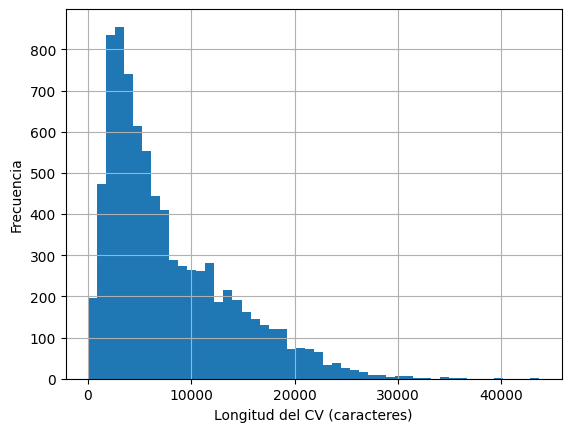

In [20]:
import matplotlib.pyplot as plt

df['resume_len'].hist(bins=50)
plt.xlabel("Longitud del CV (caracteres)")
plt.ylabel("Frecuencia")
plt.show()


In [21]:
(df['resume_len'] < 200).sum(), (df['resume_len'] < 500).sum()

(15, 93)

In [22]:
import pandas as pd

# Partimos del df que ya tienes cargado
df_clean = df.copy()

# 1) Longitud del CV
df_clean['resume_len'] = df_clean['Resume'].str.len()

# 2) Eliminar duplicados exactos en el texto del CV
df_clean = df_clean.drop_duplicates(subset=['Resume'])

# 3) Filtrar CVs demasiado cortos (< 500 caracteres)
MIN_LEN = 500
df_clean = df_clean[df_clean['resume_len'] >= MIN_LEN].copy()

print("Filas después de limpiar:", df_clean.shape[0])

# 4) Renombrar columnas al estándar y añadir metadatos
df_clean = df_clean.rename(columns={
    'Resume': 'cv_text',
    'Category': 'role_raw'
})

df_clean['role_label_final'] = df_clean['role_raw']  # de momento 1:1
df_clean['source_dataset'] = 'dataset1_avishek'

# Reordenar columnas
df_clean = df_clean[[
    'cv_text',
    'role_raw',
    'role_label_final',
    'source_dataset',
    'resume_len'
]]

df_clean.head()


Filas después de limpiar: 8076


,cv_text,role_raw,role_label_final,source_dataset,resume_len
1,Python Developer Python Developer Python Devel...,Python_Developer,Python_Developer,dataset1_avishek,3467
2,R&D Engineer R&D Engineer R&D Engineer - Nokia...,Python_Developer,Python_Developer,dataset1_avishek,2812
3,Sr. Full Stack Developer Sr. Full Stack Develo...,Python_Developer,Python_Developer,dataset1_avishek,16606
4,Sr. Full Stack Python Developer Sr. Full Stack...,Python_Developer,Python_Developer,dataset1_avishek,9253
5,Sr. Python Developer Sr. Python Developer Sr. ...,Python_Developer,Python_Developer,dataset1_avishek,15659


In [23]:
output_path = "resumes_dataset1_clean.csv"  # se guarda en 2.cleaning
df_clean.to_csv(output_path, index=False)
print("Guardado:", output_path)



Guardado: resumes_dataset1_clean.csv


In [24]:
df_clean['role_label_final'].value_counts()
df_clean['resume_len'].describe()


count     8076.000000
mean      7900.757182
std       5961.312225
min        509.000000
25%       3261.750000
50%       5956.500000
75%      11352.000000
max      43638.000000
Name: resume_len, dtype: float64

In [25]:
print("Original:", df.shape[0], "filas")
print("Limpio:", df_clean.shape[0], "filas")
print("Eliminadas:", df.shape[0] - df_clean.shape[0])

print("\nDistribución por rol (dataset limpio):")
print(df_clean['role_label_final'].value_counts())


Original: 8234 filas
Limpio: 8076 filas
Eliminadas: 158

Distribución por rol (dataset limpio):
role_label_final
Python_Developer          1270
Java_Developer            1194
Web_Developer              958
Database_Administrator     917
Security_Analyst           865
Systems_Administrator      764
Project_manager            719
Front_End_Developer        523
Network_Administrator      452
Software_Developer         414
Name: count, dtype: int64
